<a href="https://colab.research.google.com/github/dimasadhinugroho888/Analisis-Mobile-Device-User-Behavior/blob/main/Analisis_Mobile_Device_User_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silakan upload file dataset CSV kamu:


Saving user_behavior_dataset.csv to user_behavior_dataset (1).csv
Contoh isi dataset:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male

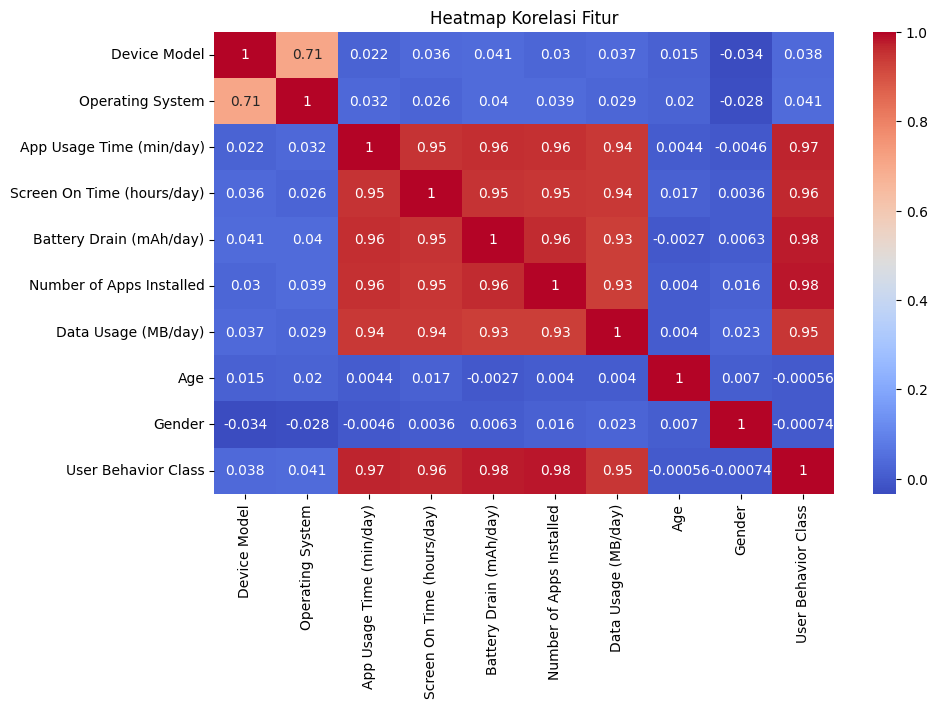

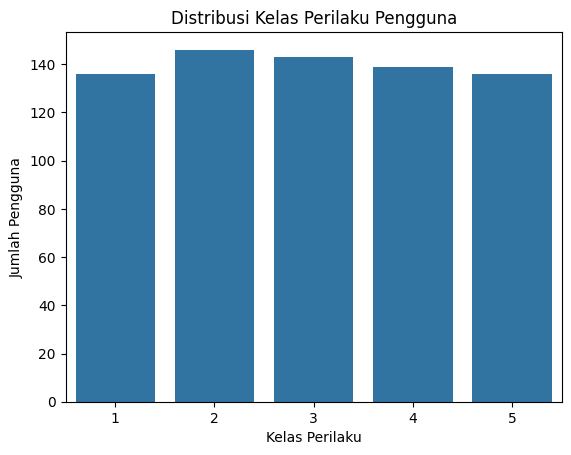


=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



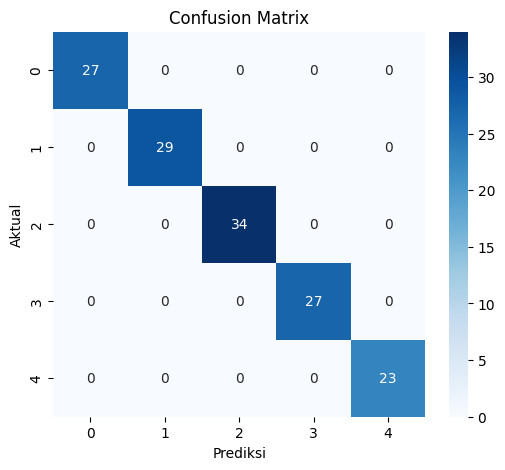

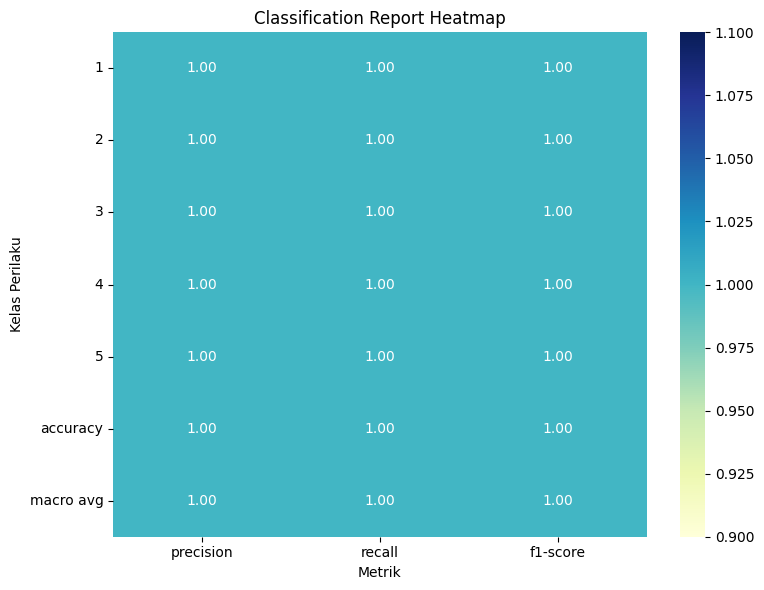

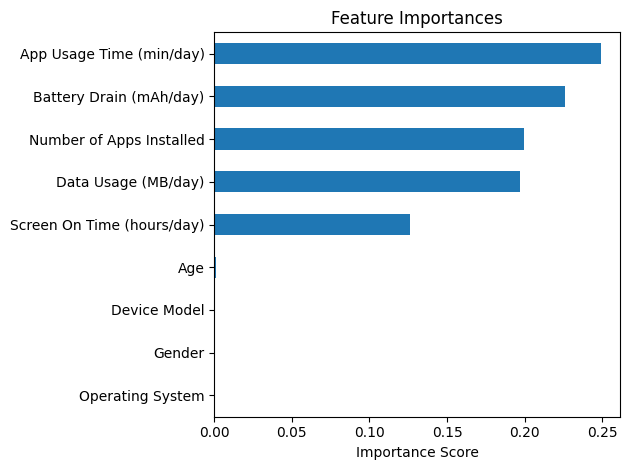

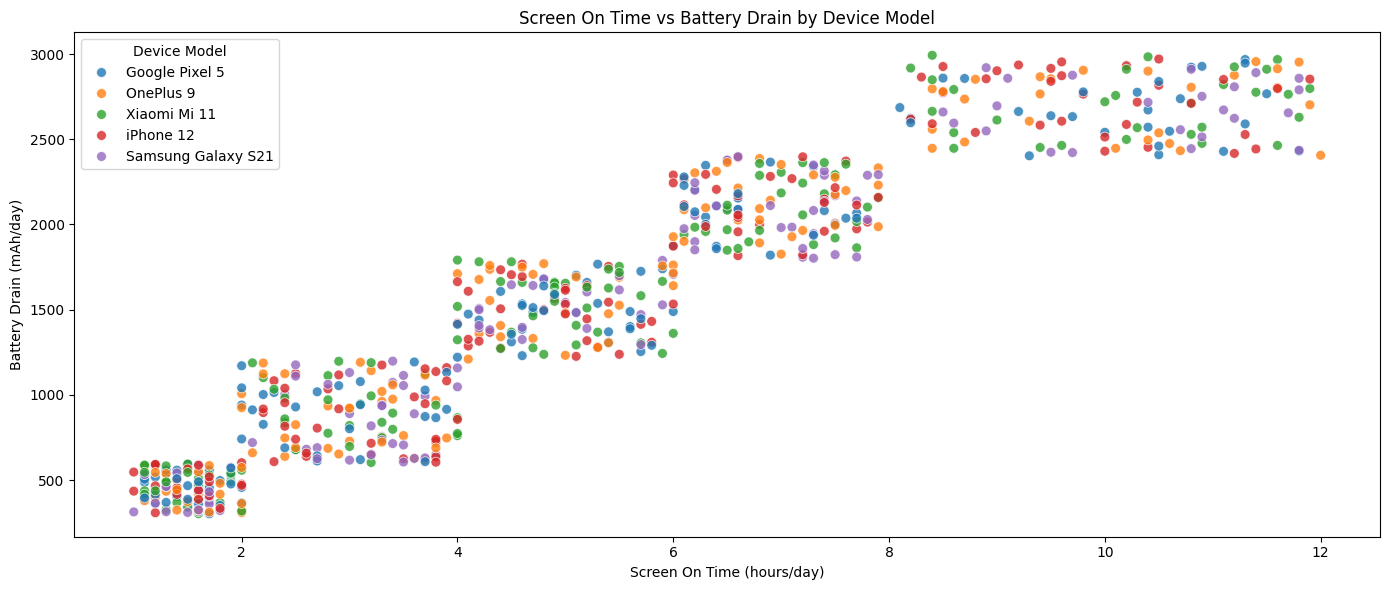

In [1]:
# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# ===============================
# 2. Upload Dataset dari Laptop
# ===============================
print("Silakan upload file dataset CSV kamu:")
uploaded = files.upload()

# Ambil nama file pertama yang diupload
file_name = list(uploaded.keys())[0]

# Baca file ke dalam DataFrame
df = pd.read_csv(file_name)

# ===============================
# 3. Tampilkan beberapa baris awal
# ===============================
print("Contoh isi dataset:")
print(df.head())

# ===============================
# 4. Drop kolom tidak perlu (misalnya User ID jika ada)
# ===============================
if "User ID" in df.columns:
    df.drop(columns=["User ID"], inplace=True)

# ===============================
# 5. Encode kolom kategorikal
# ===============================
label_encoders = {}
for col in ['Device Model', 'Operating System', 'Gender']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # simpan encoder

# ===============================
# 6. Cek apakah ada missing value
# ===============================
print("\nCek missing values:")
print(df.isnull().sum())

# ===============================
# 7. Visualisasi Korelasi
# ===============================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# ===============================
# 8. Visualisasi Distribusi Kelas
# ===============================
if 'User Behavior Class' in df.columns:
    sns.countplot(x='User Behavior Class', data=df)
    plt.title("Distribusi Kelas Perilaku Pengguna")
    plt.xlabel("Kelas Perilaku")
    plt.ylabel("Jumlah Pengguna")
    plt.show()
else:
    print("\nKolom 'User Behavior Class' tidak ditemukan di dataset.")

# ===============================
# 9. Pisahkan fitur dan target
# ===============================
X = df.drop(columns=['User Behavior Class'])
y = df['User Behavior Class']

# ===============================
# 10. Standarisasi fitur
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 11. Split data latih dan uji
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ===============================
# 12. Buat dan latih model Random Forest
# ===============================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ===============================
# 13. Prediksi data uji
# ===============================
y_pred = model.predict(X_test)

# ===============================
# 14. Evaluasi Model
# ===============================
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# ===============================
# 15. Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ===============================
# 16. Visualisasi Classification Report
# ===============================
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.xlabel("Metrik")
plt.ylabel("Kelas Perilaku")
plt.tight_layout()
plt.show()

# ===============================
# 17. Menampilkan pentingnya fitur
# ===============================
feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
feature_importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ===============================
# 18. Visualisasi hubungan Screen On Time vs Battery Drain per Device Model
# ===============================
if 'Device Model' in df.columns and 'Screen On Time (hours/day)' in df.columns and 'Battery Drain (mAh/day)' in df.columns:
    df['Device Model Label'] = label_encoders['Device Model'].inverse_transform(df['Device Model'])
    plt.figure(figsize=(14, 6))
    sns.scatterplot(
        data=df,
        x='Screen On Time (hours/day)',
        y='Battery Drain (mAh/day)',
        hue='Device Model Label',
        palette='tab10',
        s=50,
        alpha=0.8
    )
    plt.title("Screen On Time vs Battery Drain by Device Model")
    plt.xlabel("Screen On Time (hours/day)")
    plt.ylabel("Battery Drain (mAh/day)")
    plt.legend(title='Device Model')
    plt.tight_layout()
    plt.show()
else:
    print("\nKolom untuk scatterplot tidak ditemukan dalam dataset.")
